In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm

import host_galaxy_enhancement_plots as hostplot


In [2]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')

In [3]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/'

print("For TNG50:")
TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])
TNG_50_control = control.control_samples_TNG(TNG_50_pop)
TNG_color = '#d95f02'

brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: '#bdc9e1', brahma_simName_array[1]: '#67a9cf', brahma_simName_array[2]: '#1c9099', brahma_simName_array[3]: '#016c59'}
brahma_sim_obj = {}
brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    print(sim)
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control
    #brahma_sim_zbin_width,brahma_sim_zbins[sim] =hostplot.find_best_z_width(brahma_control.z_merging_pop,z_min=0,z_max=10,z_width_initial=0.2)
    brahma_sim_zbins[sim] = hostplot.find_adaptive_z_bins(brahma_control.z_merging_pop,z_min=0,z_max=5,zbin_width=0.3,min_N_values=5)
    


TNG_50_zbins = hostplot.find_adaptive_z_bins(TNG_50_control.z_merging_pop,z_min=0,z_max=10,zbin_width=0.3,min_N_values=50)
print('TNG50',TNG_50_zbins )
brahma_zbins = hostplot.find_brahma_adaptive_z_bins(brahma_sim_obj,brahma_simName_array,z_lower=0,z_max=10,zbin_width=0.1,min_N_values=10)
print('Brahma common zbins:',brahma_zbins)


sim_names = brahma_simName_array + ['TNG50']
sim_colors = [brahma_sim_colors[sim] for sim in brahma_simName_array] + [TNG_color]
sim_objs = brahma_sim_obj
sim_objs['TNG50'] = TNG_50_control
sim_zbins_list = [brahma_zbins for sim in brahma_simName_array] + [TNG_50_zbins]

For TNG50:


processing each merger redshifts for controls: 100%|██████████| 83/83 [00:02<00:00, 40.85it/s]
/home/pranavsatheesh/host_galaxies/notebooks/enhancement_plot_notebooks/../../py_files/control_sample.py:378: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of available mergers in this population is 504
Number of cases where a close enough match is not found within the acceptable tolerance: 14
SM5_TNG


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 26.07it/s]
/home/pranavsatheesh/host_galaxies/notebooks/enhancement_plot_notebooks/../../py_files/control_sample.py:598: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of cases where a close enough match is not found within the acceptable tolerance: 110
number of processable mergers with valid controls:
664
[32, 47, 53, 95, 97, 138, 97, 48]
SM5_LW10_TNG


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 31.15it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 104
number of processable mergers with valid controls:
539
[24, 33, 51, 72, 69, 96, 88, 52]
SM5_LW10_LOWSPIN_TNG


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 45.61it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 80
number of processable mergers with valid controls:
405
[28, 22, 29, 41, 44, 91, 59, 35]
SM5_LW10_LOWSPIN_RICH_TNG


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 116.12it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 49
number of processable mergers with valid controls:
127
[9, 7, 5, 15, 14, 25, 12, 17]
[55, 57, 54, 63, 65, 57, 70, 50]
TNG50 [0.  0.3 0.6 0.9 1.3 1.7 2.1 2.6 3.8]
Brahma common zbins: [0.  0.4 1.  1.6 2.2 3.1 4.1 5.1 8.1]


In [4]:
for i,sim in enumerate(sim_names):
    sim_obj = sim_objs[sim]
    print(sim,np.max(sim_obj.z_merging_pop))

SM5_TNG 8.012172948865935
SM5_LW10_TNG 8.012172948865935
SM5_LW10_LOWSPIN_TNG 9.00233985416247
SM5_LW10_LOWSPIN_RICH_TNG 9.996590466186332
TNG50 4.995933468164624


SM5_TNG [ 42 185  97 138  97  48  33  24]
SM5_LW10_TNG [ 32 148  69  96  88  52  31  23]
SM5_LW10_LOWSPIN_TNG [37 83 44 91 59 35 26 28]
SM5_LW10_LOWSPIN_RICH_TNG [12 24 14 25 12 17 11 10]
TNG50 [55 57 54 63 65 57 70 50]


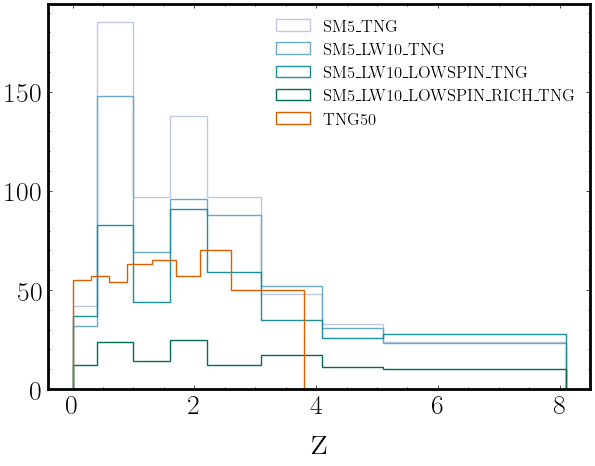

In [5]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=30,xlabelsize=20,ylabelsize=20,legendsize=12)
fig,ax = plt.subplots(1,1,figsize=(7,5))

for i,sim in enumerate(sim_names):

    z_mergers = sim_objs[sim].z_merging_pop
    N,_ = np.histogram(z_mergers,bins=sim_zbins_list[i])
    print(sim,N)
    ax.hist(z_mergers,bins=sim_zbins_list[i],label=sim,histtype='step',color=sim_colors[i])
ax.set_xlabel("z")
ax.legend()
plt.show()

### Check all matches in brahma runs

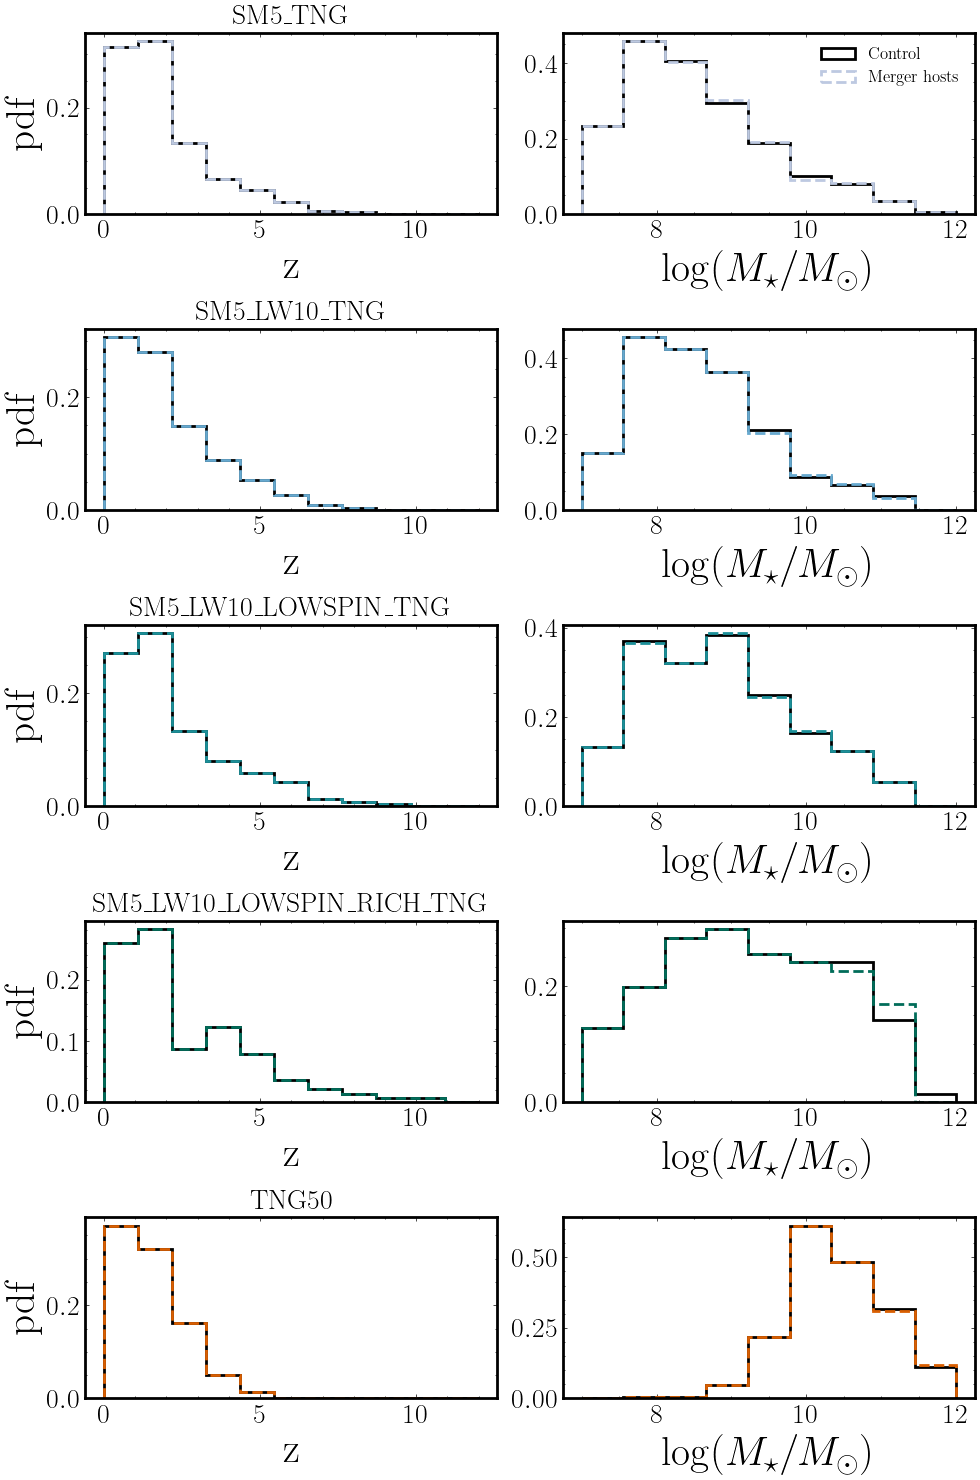

In [6]:
fig, axes = plt.subplots(5,2, figsize=(10,15))
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,xlabelsize=20,ylabelsize=20,legendsize=12)
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(sim_names):
    ax_plt = [axes[i][0],axes[i][1]]
    axes_plt = hostplot.match_z_Mstar_plot(ax_plt,brahma_sim_obj[sim],sim_color=sim_colors[i],Mstar_binsize = 0.5,Mstar_min = 7,Mstar_max = 12,z_binsize =1,z_min = 0,z_max = 12)
    axes_plt[0].set_title(sim)
    if i==0:
        axes_plt[1].legend()
    axes_plt[0].set_xlabel('z')
    axes_plt[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
    axes_plt[0].set_ylabel('pdf')
    #axes_plt[1].set_ylabel('N')
fig.tight_layout()
fig.savefig('../../figures/Mstar_z_distribution_brahma_all.pdf')

## sSFR enhancements in BRAHMA 

Median sSFR in mergers:
SM5_TNG,2.50e-01
SM5_LW10_TNG,3.82e-01
SM5_LW10_LOWSPIN_TNG,6.53e-01
SM5_LW10_LOWSPIN_RICH_TNG,1.70e+00


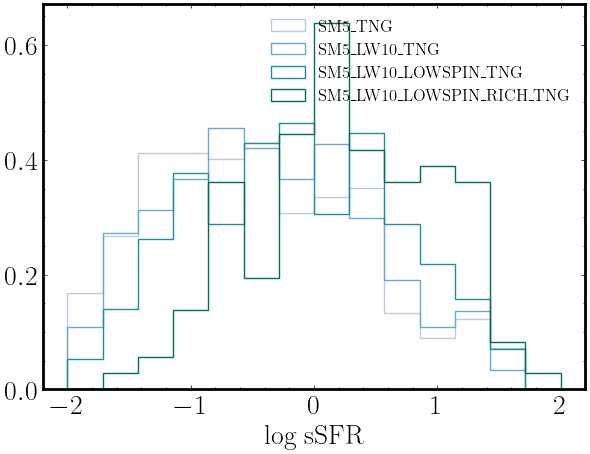

In [7]:
SFR_log_min = -2
SFR_log_max = 2
SFR_log_bins = np.linspace(SFR_log_min,SFR_log_max,15)

#hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

print("Median sSFR in mergers:")
for i,sim in enumerate(brahma_simName_array):

    SFR_mergers = brahma_sim_obj[sim].SFR_merging_pop
    print(f"{sim},{np.median(SFR_mergers[SFR_mergers>0]):2.2e}")
    ax.hist(np.log10(SFR_mergers[SFR_mergers>0]),bins=SFR_log_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log sSFR")
ax.legend()
plt.show()

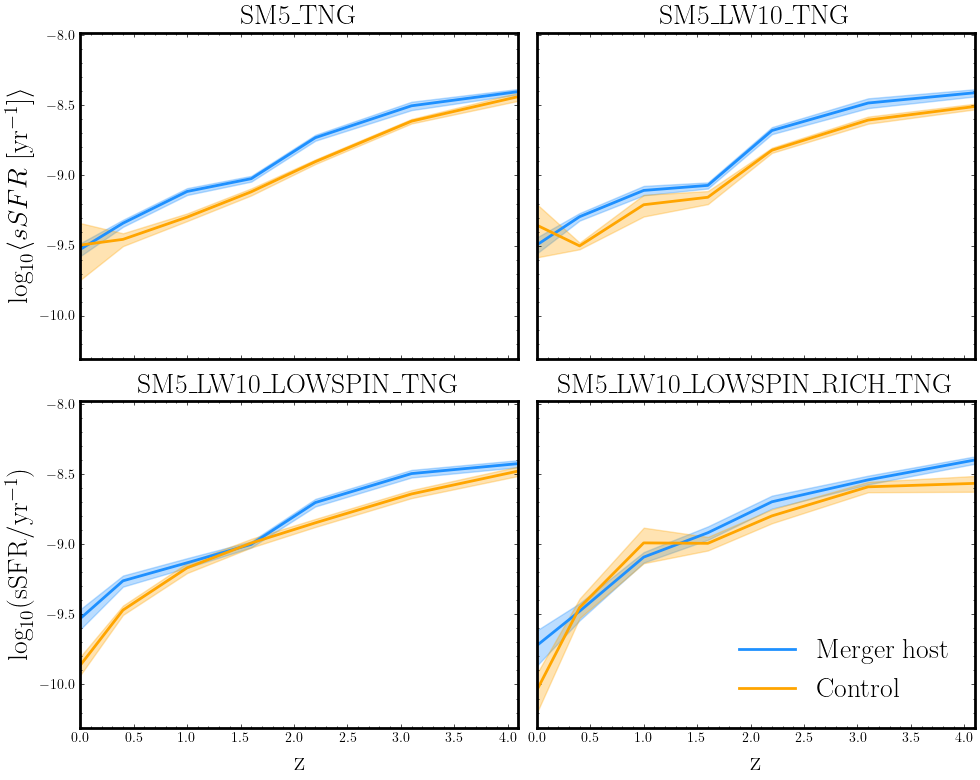

In [8]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,legendsize=20)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)

flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax1 = hostplot.sSFR_evolution_comparison_plot(flattened_axes[i],brahma_sim_obj[sim],brahma_zbins)
    ax1.set_title(sim)
    ax1.set_xlim(0,brahma_sim_zbins[sim][-1])

axes[0,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_ylabel(r'$\log_{10}(\mathrm{sSFR/yr^{-1}})$')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout()

In [9]:
def merger_enhancement_calc(sim_obj,quantity,zbins,log=True):

    avg_quantity_enhancement = []
    std_quantity_enhancement = []

    for i in range(len(zbins)-1):
        merger_z_mask = (sim_obj.z_merging_pop >= zbins[i]) & (sim_obj.z_merging_pop < zbins[i+1])
        merger_z_mask = merger_z_mask & sim_obj.major_major_merger_mask

        if quantity == 'Mgas':
            merging_pop_quantity = getattr(sim_obj,'MgasInRad')[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,'Mgas_control_pop')[merger_z_mask]
            
           
        elif quantity == 'fgas':
            merging_pop_quantity = getattr(sim_obj,'fgas_post_merger')[merger_z_mask]/getattr(sim_obj,'MstarInRad')[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,'fgas_control')[merger_z_mask]/getattr(sim_obj,'Mstar_control_pop')[merger_z_mask]
        
        elif quantity == 'StellarHalfmassRad':
            scale_factor_mergers = 1/(1+sim_obj.z_merging_pop[merger_z_mask])
            scale_factor_controls = 1/(1+sim_obj.z_control_pop[merger_z_mask])
            merging_pop_quantity = getattr(sim_obj,'StellarHalfmassRad_merging_pop')[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,'StellarHalfmassRad_control_pop')[merger_z_mask]
            merging_pop_quantity = merging_pop_quantity * scale_factor_mergers
            control_pop_quantity = control_pop_quantity * scale_factor_controls        
            
        else:
            merging_pop_quantity = getattr(sim_obj,quantity+"_merging_pop")[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,quantity+"_control_pop")[merger_z_mask]

        if log == True:
            quantity_log_enhancement = []
            for i in range(len(control_pop_quantity)):
                if control_pop_quantity[i]>0 and merging_pop_quantity[i]>0:
                    quantity_log_enhancement.append(np.log10(merging_pop_quantity[i]/control_pop_quantity[i]))
            avg_quantity_enhancement.append(np.mean(quantity_log_enhancement))
            std_quantity_enhancement.append(np.std(quantity_log_enhancement)/np.sqrt(len(quantity_log_enhancement)))
            #std_quantity_enhancement.append(stats.sem(quantity_log_enhancement))
        else:
            quantity_enhancement = merging_pop_quantity - control_pop_quantity
            avg_quantity_enhancement.append(np.mean(quantity_enhancement))
            std_quantity_enhancement.append(np.std(quantity_enhancement)/np.sqrt(len(quantity_enhancement)))
            #std_quantity_enhancement.append(stats.sem(quantity_enhancement))
    
    avg_quantity_enhancement = np.array(avg_quantity_enhancement)
    std_quantity_enhancement = np.array(std_quantity_enhancement)

    return avg_quantity_enhancement,std_quantity_enhancement

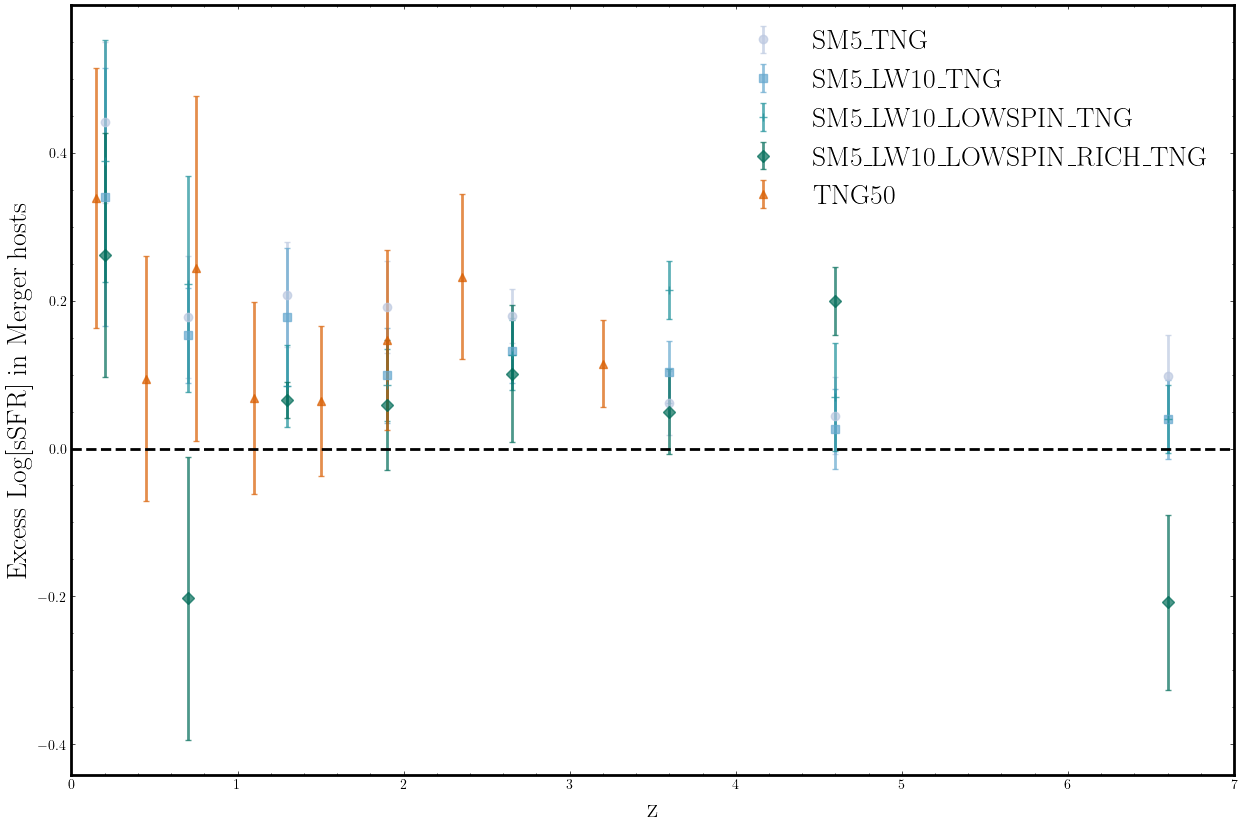

In [10]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
sim_markers = {'SM5_TNG': 'o', 'SM5_LW10_TNG': 's', 'SM5_LW10_LOWSPIN_TNG': '+', 'SM5_LW10_LOWSPIN_RICH_TNG': 'D', 'TNG50': '^'}
for i,sim in enumerate(sim_names):

    avg_sSFR,std_sSFR = merger_enhancement_calc(sim_objs[sim],'sSFR',sim_zbins_list[i],log=True)
    ax.errorbar(sim_zbins_list[i][:-1]+np.diff(sim_zbins_list[i])/2,avg_sSFR,yerr=std_sSFR,fmt=sim_markers[sim],capsize=2,label=sim,color=sim_colors[i],alpha=0.7)
ax.set_xlabel('z')
ax.axhline(0,ls='--',color='black')
ax.legend()
ax.set_xlim(0,7)
ax.set_ylabel('Excess Log[sSFR] in Merger hosts')
fig.savefig('../../figures/sSFR_enhancement_comparison_all.pdf')

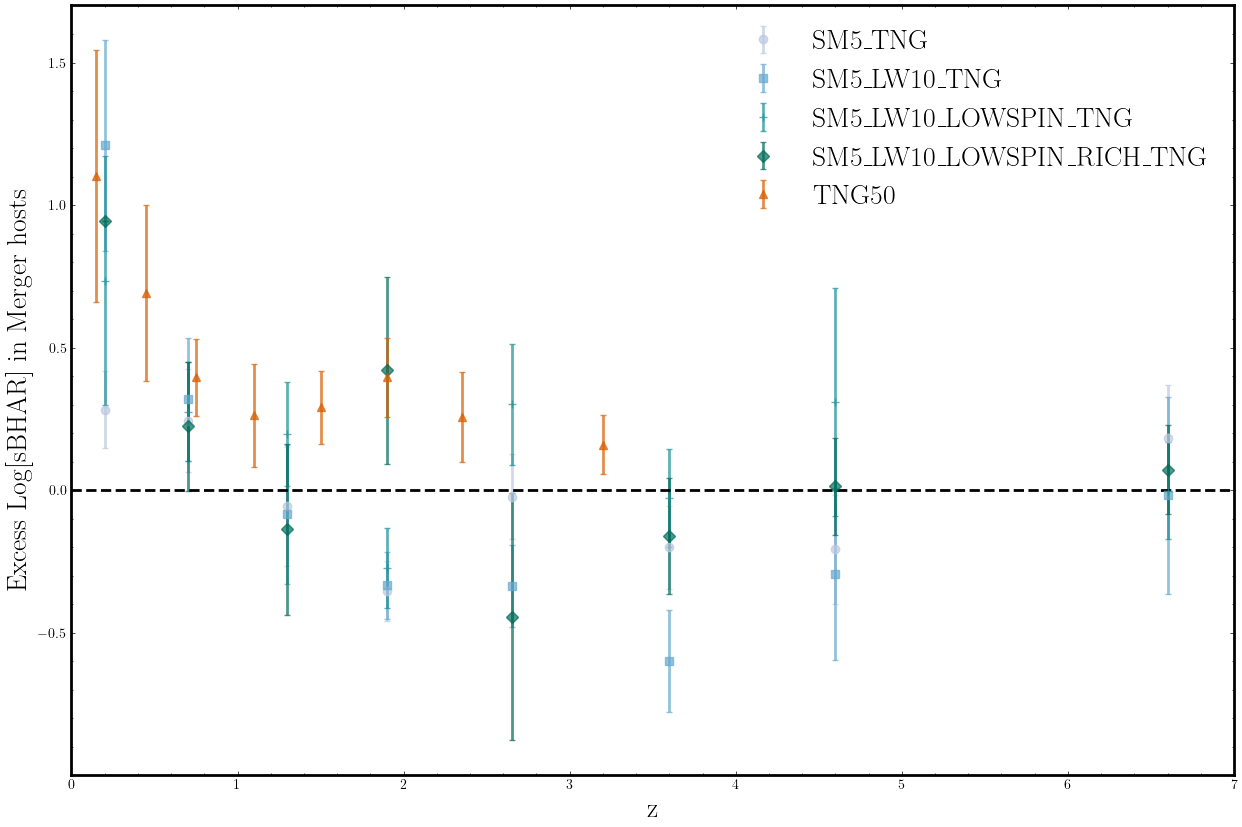

In [11]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
sim_markers = {'SM5_TNG': 'o', 'SM5_LW10_TNG': 's', 'SM5_LW10_LOWSPIN_TNG': '+', 'SM5_LW10_LOWSPIN_RICH_TNG': 'D', 'TNG50': '^'}
for i,sim in enumerate(sim_names):

    avg_sBHAR,std_sBHAR = merger_enhancement_calc(sim_objs[sim],'sBHAR',sim_zbins_list[i],log=True)
    ax.errorbar(sim_zbins_list[i][:-1]+np.diff(sim_zbins_list[i])/2,avg_sBHAR,yerr=std_sBHAR,fmt=sim_markers[sim],capsize=2,label=sim,color=sim_colors[i],alpha=0.7)
ax.set_xlabel('z')
ax.axhline(0,ls='--',color='black')
ax.legend()
ax.set_xlim(0,7)
ax.set_ylabel('Excess Log[sBHAR] in Merger hosts')
fig.savefig('../../figures/sBHAR_enhancement_comparison_all.pdf')

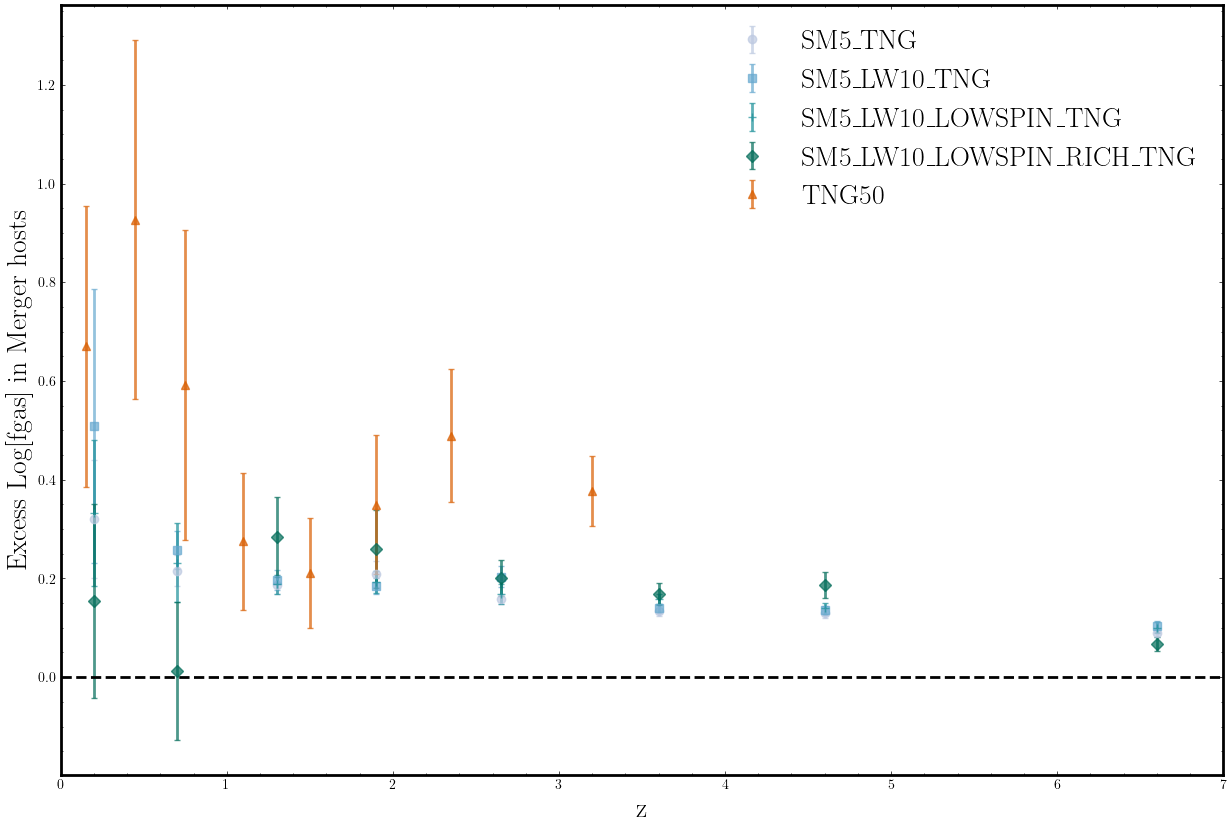

In [12]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
sim_markers = {'SM5_TNG': 'o', 'SM5_LW10_TNG': 's', 'SM5_LW10_LOWSPIN_TNG': '+', 'SM5_LW10_LOWSPIN_RICH_TNG': 'D', 'TNG50': '^'}
for i,sim in enumerate(sim_names):

    avg_sBHAR,std_sBHAR = merger_enhancement_calc(sim_objs[sim],'fgas',sim_zbins_list[i],log=True)
    ax.errorbar(sim_zbins_list[i][:-1]+np.diff(sim_zbins_list[i])/2,avg_sBHAR,yerr=std_sBHAR,fmt=sim_markers[sim],capsize=2,label=sim,color=sim_colors[i],alpha=0.7)
ax.set_xlabel('z')
ax.axhline(0,ls='--',color='black')
ax.legend()
ax.set_xlim(0,7)
ax.set_ylabel('Excess Log[fgas] in Merger hosts')
fig.savefig('../../figures/fgas_enhancement_comparison_all.pdf')

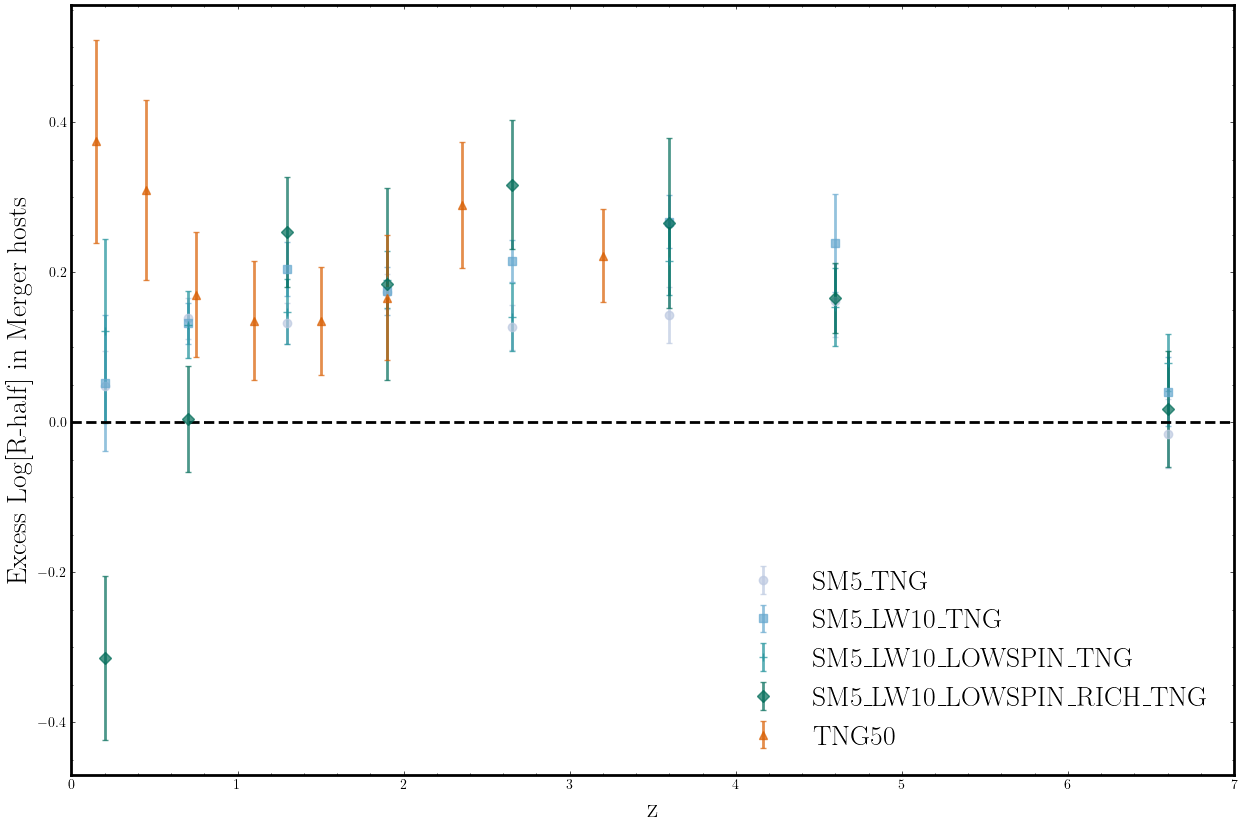

In [13]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
sim_markers = {'SM5_TNG': 'o', 'SM5_LW10_TNG': 's', 'SM5_LW10_LOWSPIN_TNG': '+', 'SM5_LW10_LOWSPIN_RICH_TNG': 'D', 'TNG50': '^'}
for i,sim in enumerate(sim_names):

    avg_sBHAR,std_sBHAR = merger_enhancement_calc(sim_objs[sim],'StellarHalfmassRad',sim_zbins_list[i],log=True)
    ax.errorbar(sim_zbins_list[i][:-1]+np.diff(sim_zbins_list[i])/2,avg_sBHAR,yerr=std_sBHAR,fmt=sim_markers[sim],capsize=2,label=sim,color=sim_colors[i],alpha=0.7)
ax.set_xlabel('z')
ax.axhline(0,ls='--',color='black')
ax.legend()
ax.set_xlim(0,7)
ax.set_ylabel('Excess Log[R-half] in Merger hosts')
fig.savefig('../../figures/Rhalf_enhancement_comparison_all.pdf')

In [14]:
def plot_color_magnitude_diagram(ax,sim_obj,plot_name,sim_color,sim_alpha=1,sim_size=10,scatter=True,contours=True,hist_bins=20
                                 ,z_lower=0,z_upper=2):



    z_mergers = sim_obj.z_merging_pop
    z_mask = (z_mergers >= z_lower) & (z_mergers < z_upper)
    major_major_merger_mask = sim_obj.major_major_merger_mask
    z_mask = z_mask & major_major_merger_mask


    Mg_mergers = sim_obj.SubhaloPhotoMag_merging_pop[z_mask,4]
    Mr_mergers = sim_obj.SubhaloPhotoMag_merging_pop[z_mask,5]

    Mg_controls = sim_obj.SubhaloPhotoMag_control_pop[z_mask,4]
    Mr_controls = sim_obj.SubhaloPhotoMag_control_pop[z_mask,5]

    if scatter:
        ax.scatter(Mg_mergers - Mr_mergers, Mr_mergers, color=sim_color, alpha=sim_alpha,label='mergers', s=sim_size, marker="o")
        ax.scatter(Mg_controls - Mr_controls, Mr_controls, color='black', alpha=sim_alpha/2,label='controls', s=sim_size, marker="^")
    if contours:
        x_mergers = Mg_mergers - Mr_mergers
        y_mergers = Mr_mergers
        valid = np.isfinite(x_mergers) & np.isfinite(y_mergers)
        x_mergers = x_mergers[valid]
        y_mergers = y_mergers[valid]
        H,xedges,yedges = np.histogram2d(x_mergers,y_mergers,bins=hist_bins,range=[[np.min(x_mergers), np.max(x_mergers)], [np.min(y_mergers), np.max(y_mergers)]])
        xcent = 0.5*(xedges[1:] + xedges[:-1])
        ycent = 0.5*(yedges[1:] + yedges[:-1])
        X,Y = np.meshgrid(xcent,ycent)
        flat = H.ravel()
        flat_nonzero = flat[flat > 0]
        perc = np.percentile(flat_nonzero,[50,68,90])   
        ax.contour(X,Y,H.T,levels=perc,cmap='cividis',alpha=sim_alpha)

        x_controls = Mg_controls - Mr_controls
        y_controls = Mr_controls
        valid = np.isfinite(x_controls) & np.isfinite(y_controls)
        x_controls = x_controls[valid]
        y_controls = y_controls[valid]
        H,xedges,yedges = np.histogram2d(x_controls,y_controls,bins=hist_bins,range=[[np.min(x_controls), np.max(x_controls)], [np.min(y_controls), np.max(y_controls)]])
        xcent = 0.5*(xedges[1:] + xedges[:-1])
        ycent = 0.5*(yedges[1:] + yedges[:-1])
        X,Y = np.meshgrid(xcent,ycent)
        flat = H.ravel()
        flat_nonzero = flat[flat > 0]
        perc = np.percentile(flat_nonzero,[50,68,90])   
        ax.contour(X,Y,H.T,levels=perc,cmap='heatmap',alpha=sim_alpha)

    return ax

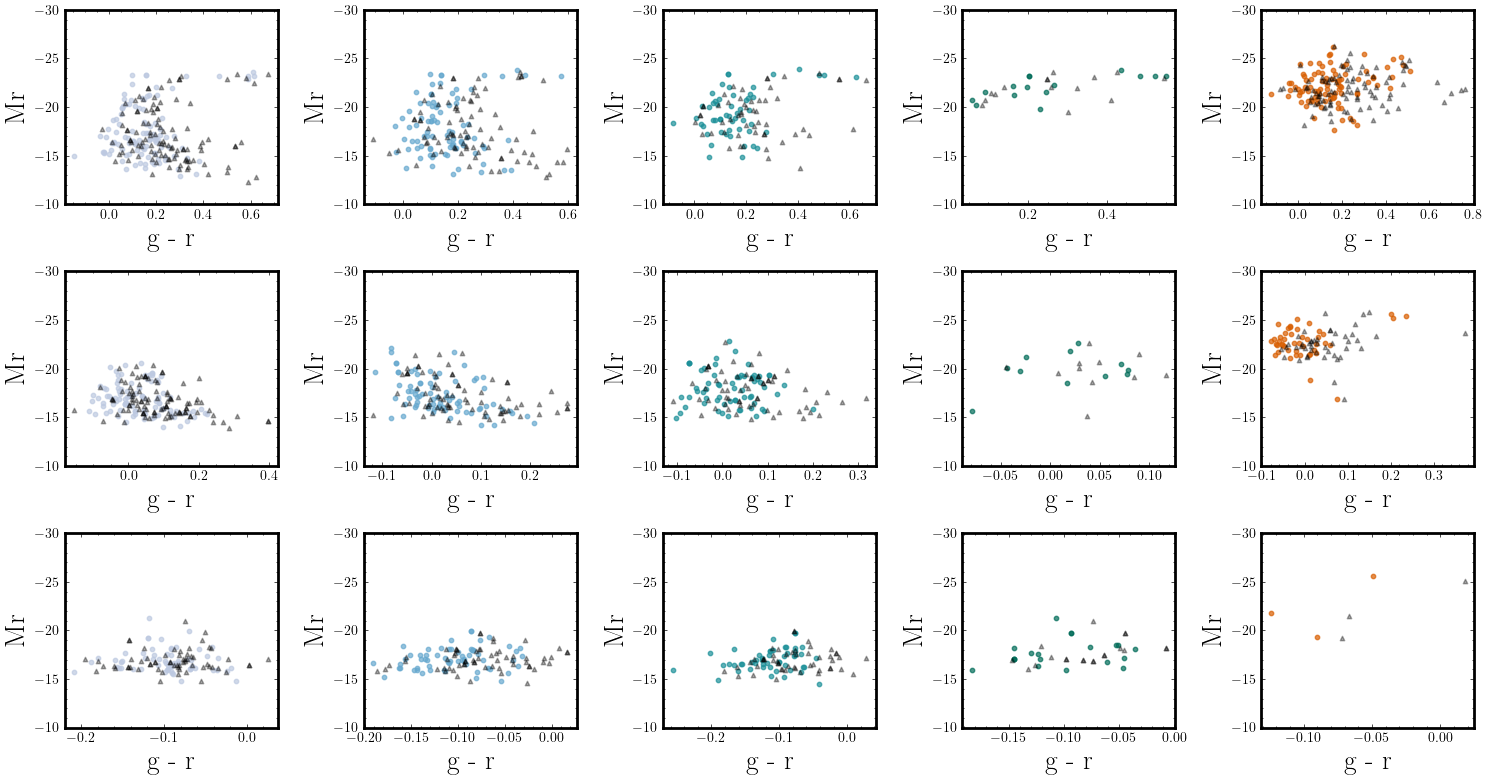

In [15]:
fig,axes = plt.subplots(3,5,figsize=(15,8))

for i,sim in enumerate(sim_names):
    plot_color_magnitude_diagram(axes[0,i], sim_objs[sim], plot_name=sim, sim_color=sim_colors[i], sim_alpha=0.7, 
                                 sim_size=10,contours=False,z_lower=0,z_upper=2)
    axes[0,i].set_xlabel('g - r')
    axes[0,i].set_ylabel('Mr')
    axes[0,i].set_ylim(-30, -10)
    axes[0,i].invert_yaxis()
    
    plot_color_magnitude_diagram(axes[1,i], sim_objs[sim], plot_name=sim, sim_color=sim_colors[i], sim_alpha=0.7, 
                                 sim_size=10,contours=False,z_lower=2,z_upper=4)
    axes[1,i].set_xlabel('g - r')
    axes[1,i].set_ylabel('Mr')
    axes[1,i].set_ylim(-30, -10)
    axes[1,i].invert_yaxis()

    plot_color_magnitude_diagram(axes[2,i], sim_objs[sim], plot_name=sim, sim_color=sim_colors[i], sim_alpha=0.7, 
                                 sim_size=10,contours=False,z_lower=4,z_upper=8)
    axes[2,i].set_xlabel('g - r')
    axes[2,i].set_ylabel('Mr')
    axes[2,i].set_ylim(-30, -10)
    axes[2,i].invert_yaxis()


fig.tight_layout()

### Enhancements vs Mass Ratios

In [16]:
def merger_enhancement_calc_for_mu(sim_obj,quantity,zbins,mu_option,log=True):

    #mu_option 1 : mu<0.1
    #mu_option 2 : mu>=0.1 and mu<0.25
    #mu_option 3 : mu>=0.25

    avg_quantity_enhancement = []
    std_quantity_enhancement = []

    for i in range(len(zbins)-1):
        merger_z_mask = (sim_obj.z_merging_pop >= zbins[i]) & (sim_obj.z_merging_pop < zbins[i+1])
        
        if mu_option == 1:
            merger_z_mask = merger_z_mask & (sim_obj.q_merger < 0.1)
            
        elif mu_option == 2:
            merger_z_mask = merger_z_mask & (sim_obj.q_merger > 0.1) & (sim_obj.q_merger < 0.25)
        elif mu_option == 3:
            merger_z_mask = merger_z_mask & (sim_obj.q_merger >= 0.25)
            print(np.sum(merger_z_mask))

        if quantity == 'Mgas':
            merging_pop_quantity = getattr(sim_obj,'MgasInRad')[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,'Mgas_control_pop')[merger_z_mask]
            
           
        elif quantity == 'fgas':
            merging_pop_quantity = getattr(sim_obj,'fgas_post_merger')[merger_z_mask]/getattr(sim_obj,'MstarInRad')[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,'fgas_control')[merger_z_mask]/getattr(sim_obj,'Mstar_control_pop')[merger_z_mask]
        
        elif quantity == 'StellarHalfmassRad':
            scale_factor_mergers = 1/(1+sim_obj.z_merging_pop[merger_z_mask])
            scale_factor_controls = 1/(1+sim_obj.z_control_pop[merger_z_mask])
            merging_pop_quantity = getattr(sim_obj,'StellarHalfmassRad_merging_pop')[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,'StellarHalfmassRad_control_pop')[merger_z_mask]
            merging_pop_quantity = merging_pop_quantity * scale_factor_mergers
            control_pop_quantity = control_pop_quantity * scale_factor_controls        
            
        else:
            merging_pop_quantity = getattr(sim_obj,quantity+"_merging_pop")[merger_z_mask]
            control_pop_quantity = getattr(sim_obj,quantity+"_control_pop")[merger_z_mask]

        if log == True:
            quantity_log_enhancement = []
            for i in range(len(control_pop_quantity)):
                if control_pop_quantity[i]>0 and merging_pop_quantity[i]>0:
                    quantity_log_enhancement.append(np.log10(merging_pop_quantity[i]/control_pop_quantity[i]))
            avg_quantity_enhancement.append(np.median(quantity_log_enhancement))
            #std_quantity_enhancement.append(np.std(quantity_log_enhancement)/np.sqrt(len(quantity_log_enhancement)))
            std_quantity_enhancement.append(stats.sem(quantity_log_enhancement))
        else:
            quantity_enhancement = merging_pop_quantity - control_pop_quantity
            avg_quantity_enhancement.append(np.median(quantity_enhancement))
            #std_quantity_enhancement.append(np.std(quantity_enhancement)/np.sqrt(len(quantity_enhancement)))
            std_quantity_enhancement.append(stats.sem(quantity_enhancement))
    
    avg_quantity_enhancement = np.array(avg_quantity_enhancement)
    std_quantity_enhancement = np.array(std_quantity_enhancement)

    return avg_quantity_enhancement,std_quantity_enhancement

In [114]:
def merger_enhancement_calc_for_mu(sim_obj,quantity,z_start,zbin,zend=4,Nmin=10,log=True):

    z_bins = []
    avg_quantity_enhancement_major = []
    std_quantity_enhancement_major = []
    avg_quantity_enhancement_minor = []
    std_quantity_enhancement_minor = []

    z_next = z_start
    z_bins.append(z_start)
    while True:
        #z_next = z_next + zbin
        merger_z_mask = (sim_obj.z_merging_pop >= z_next) & (sim_obj.z_merging_pop < (z_next + zbin))
        major_merger_z_mask = merger_z_mask & (sim_obj.q_merger >= 0.25)
        minor_merger_z_mask = merger_z_mask & (sim_obj.q_merger < 0.25) & (sim_obj.q_merger >= 0.1)
        
        if np.sum(major_merger_z_mask) >= Nmin and np.sum(minor_merger_z_mask) >= Nmin:
            #print(f"z bin: {z_next}-{z_next + zbin}, Major mergers: {np.sum(major_merger_z_mask)}, Minor mergers: {np.sum(minor_merger_z_mask)}")
            z_next = z_next + zbin
            z_bins.append(z_next)
            if log == True:
                quantity_log_enhancement_major = []
                quantity_log_enhancement_minor = []
                for i in range(len(sim_obj.z_merging_pop[major_merger_z_mask])):
                    merging_pop_quantity = getattr(sim_obj,quantity+"_merging_pop")[major_merger_z_mask][i]
                    control_pop_quantity = getattr(sim_obj,quantity+"_control_pop")[major_merger_z_mask][i]
                    if control_pop_quantity>0 and merging_pop_quantity>0:
                        quantity_log_enhancement_major.append(np.log10(merging_pop_quantity/control_pop_quantity))
                avg_quantity_enhancement_major.append(np.median(quantity_log_enhancement_major))
                std_quantity_enhancement_major.append(stats.sem(quantity_log_enhancement_major))

                for i in range(len(sim_obj.z_merging_pop[minor_merger_z_mask])):
                    merging_pop_quantity = getattr(sim_obj,quantity+"_merging_pop")[minor_merger_z_mask][i]
                    control_pop_quantity = getattr(sim_obj,quantity+"_control_pop")[minor_merger_z_mask][i]
                    if control_pop_quantity>0 and merging_pop_quantity>0:
                        quantity_log_enhancement_minor.append(np.log10(merging_pop_quantity/control_pop_quantity))
                avg_quantity_enhancement_minor.append(np.median(quantity_log_enhancement_minor))
                std_quantity_enhancement_minor.append(stats.sem(quantity_log_enhancement_minor))
            else:
                quantity_enhancement = []
                for i in range(len(sim_obj.z_merging_pop[merger_z_mask])):
                    merging_pop_quantity = getattr(sim_obj,quantity+"_merging_pop")[merger_z_mask][i]
                    control_pop_quantity = getattr(sim_obj,quantity+"_control_pop")[merger_z_mask][i]
                    quantity_enhancement.append(merging_pop_quantity - control_pop_quantity)
                avg_quantity_enhancement.append(np.median(quantity_enhancement))
                std_quantity_enhancement.append(stats.sem(quantity_enhancement))

        else:
            z_next = z_next + zbin
        #print(z_next)
        if z_next >= zend:
            break

    return z_bins,avg_quantity_enhancement_major,std_quantity_enhancement_major,avg_quantity_enhancement_minor,std_quantity_enhancement_minor


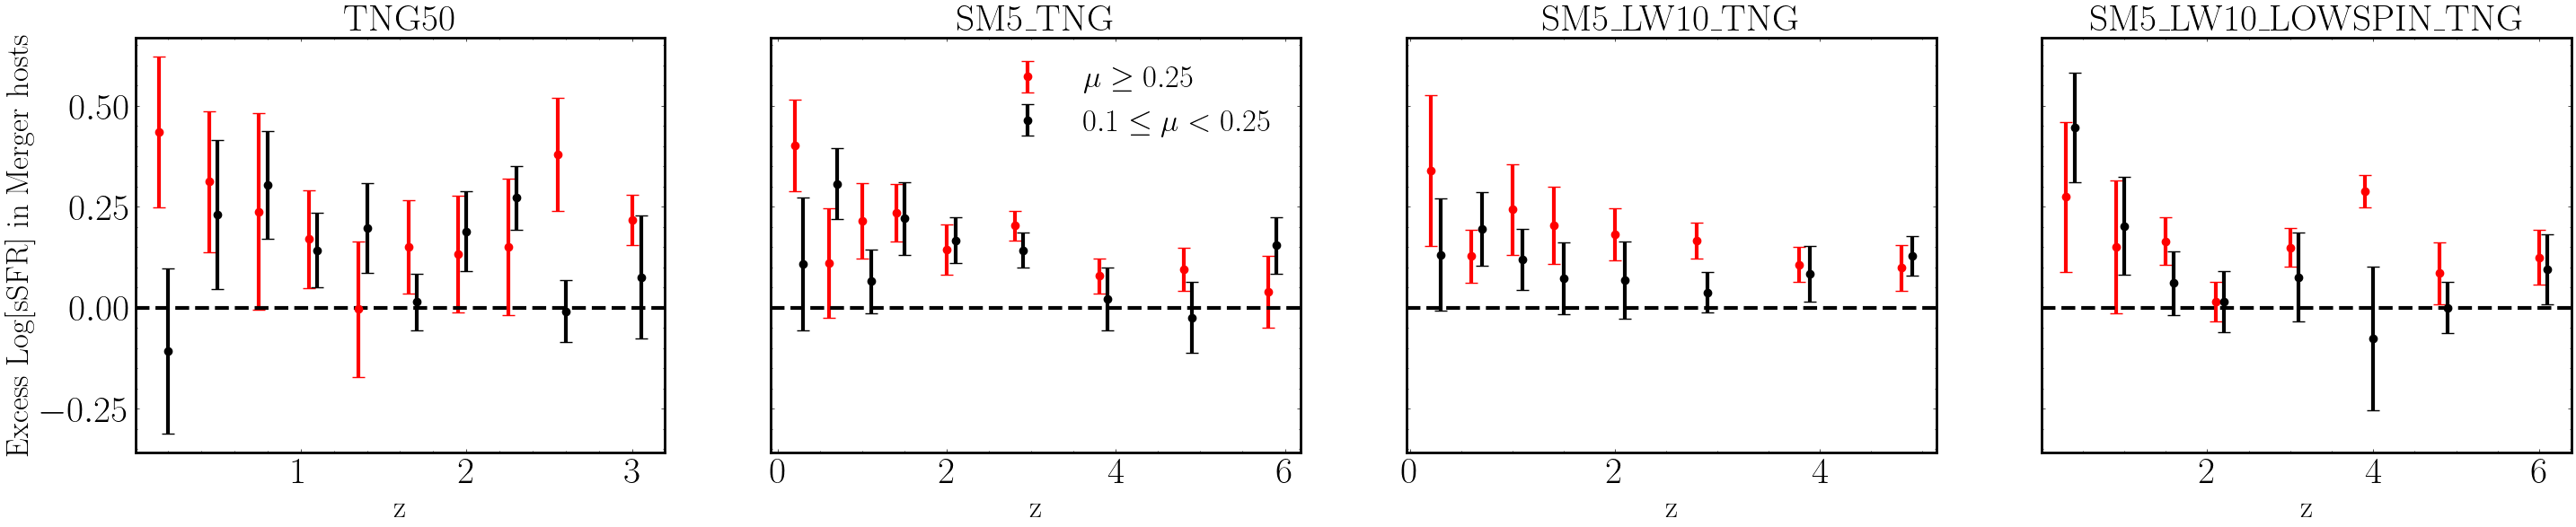

In [196]:
hostplot.set_plot_style(linewidth=3, titlesize=30,labelsize=25,xlabelsize=30,ylabelsize=30,legendsize=25)
fig,ax = plt.subplots(1,4,figsize=(35,6),sharey=True)
sim_markers = {'SM5_TNG': 'o', 'SM5_LW10_TNG': 's', 'SM5_LW10_LOWSPIN_TNG': '+', 'SM5_LW10_LOWSPIN_RICH_TNG': 'D', 'TNG50': '^'}

z_bins,avg_sSFR_major,std_sSFR_major,avg_sSFR_minor,std_sSFR_minor = merger_enhancement_calc_for_mu(sim_objs['TNG50'],'sSFR',log=True,z_start=0,zbin=0.3,zend=5,Nmin=5)
z_offset = 0.05
ax[0].errorbar(z_bins[:-1]+np.diff(z_bins)/2,avg_sSFR_major,yerr=std_sSFR_major,fmt='o',capsize=5,label="$\mu\geq0.25$",color="red",alpha=1)
ax[0].errorbar(z_bins[:-1]+np.diff(z_bins)/2+z_offset,avg_sSFR_minor,yerr=std_sSFR_minor,fmt='o',capsize=5,label="$0.1\leq\mu<0.25$",color="black",alpha=1)
ax[0].set_xlabel('z')
ax[0].axhline(0,ls='--',color='black')
ax[0].set_title('TNG50')
ax[0].set_ylabel('Excess Log[sSFR] in Merger hosts')

# ax.set_xlim(0,4)

zbin_brahma = {'SM5_TNG': 0.4, 'SM5_LW10_TNG': 0.4, 'SM5_LW10_LOWSPIN_TNG': 0.6, 'SM5_LW10_LOWSPIN_RICH_TNG': 0.2}
zend_brahma = {'SM5_TNG': 10, 'SM5_LW10_TNG': 10, 'SM5_LW10_LOWSPIN_TNG': 10, 'SM5_LW10_LOWSPIN_RICH_TNG': 10}

for i,sim in enumerate(brahma_simName_array[:-1]):
    z_bins,avg_sSFR_major,std_sSFR_major,avg_sSFR_minor,std_sSFR_minor = merger_enhancement_calc_for_mu(sim_objs[sim],'sSFR',log=True,z_start=0,zbin=zbin_brahma[sim],zend=zend_brahma[sim],Nmin=5)
    z_offset = 0.1
    ax[i+1].errorbar(z_bins[:-1]+np.diff(z_bins)/2,avg_sSFR_major,yerr=std_sSFR_major,fmt='o',capsize=5,label="$\mu\geq0.25$",color="red",alpha=1)
    ax[i+1].errorbar(z_bins[:-1]+np.diff(z_bins)/2+z_offset,avg_sSFR_minor,yerr=std_sSFR_minor,fmt='o',capsize=5,label="$0.1\leq\mu<0.25$",color="black",alpha=1)
    ax[i+1].set_xlabel('z')
    ax[i+1].axhline(0,ls='--',color='black')
    ax[i+1].set_title(sim)
    if i==1:
        ax[i].legend()
    

fig.savefig('../../figures/sSFR_enhancement_comparison_major_minor_all.pdf')
    #ax.set_xlim(0,4)


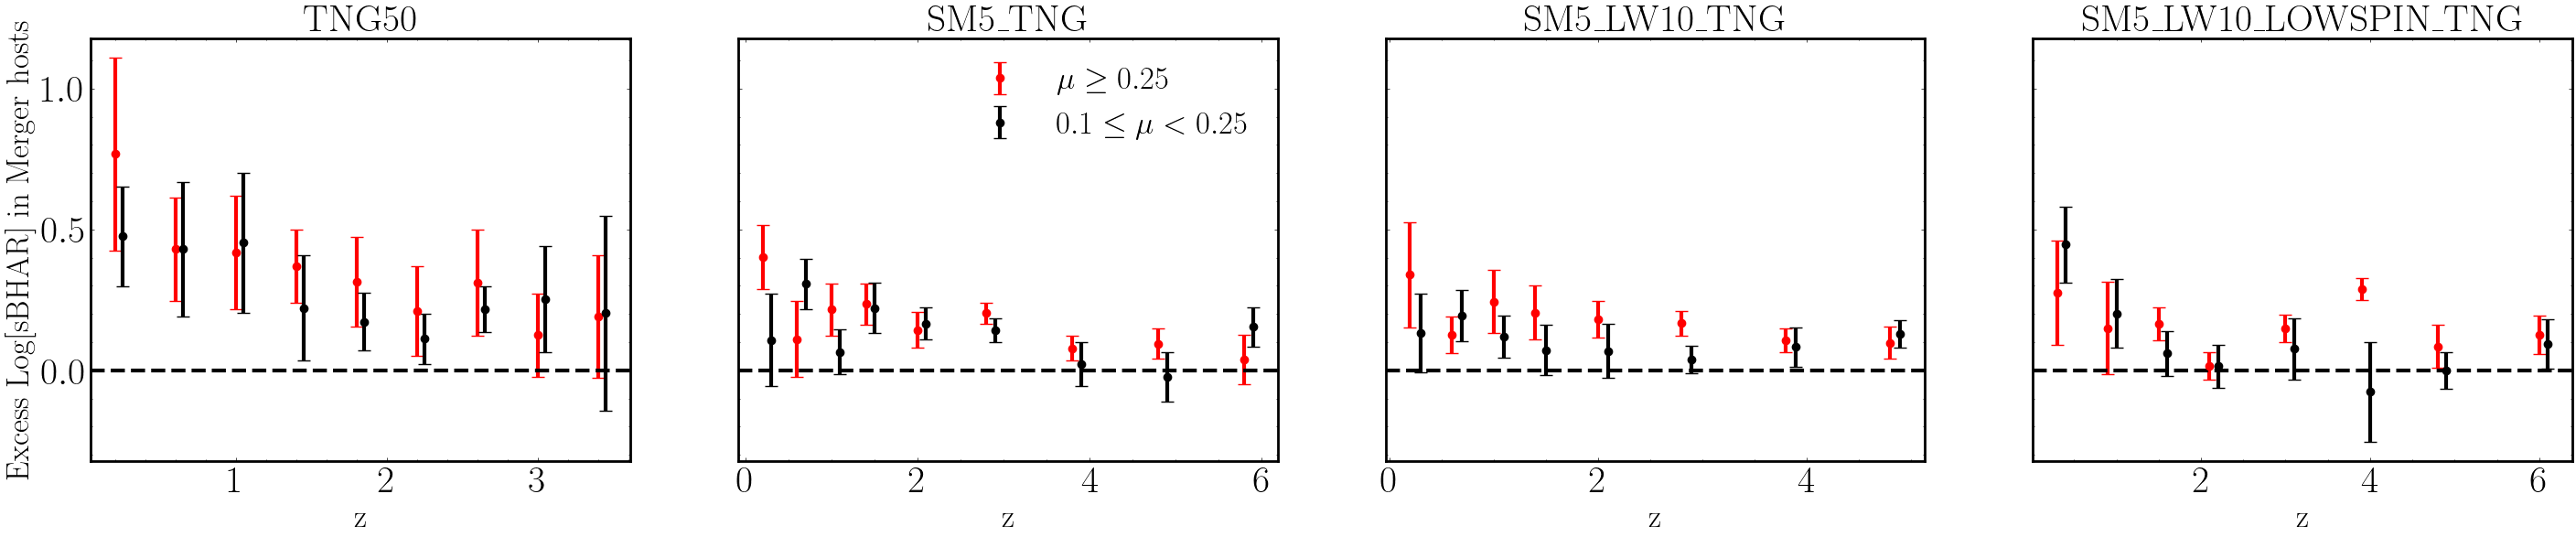

In [197]:
hostplot.set_plot_style(linewidth=3, titlesize=30,labelsize=25,xlabelsize=30,ylabelsize=30,legendsize=25)
fig,ax = plt.subplots(1,4,figsize=(35,6),sharey=True)
sim_markers = {'SM5_TNG': 'o', 'SM5_LW10_TNG': 's', 'SM5_LW10_LOWSPIN_TNG': '+', 'SM5_LW10_LOWSPIN_RICH_TNG': 'D', 'TNG50': '^'}

z_bins,avg_sSFR_major,std_sSFR_major,avg_sSFR_minor,std_sSFR_minor = merger_enhancement_calc_for_mu(sim_objs['TNG50'],'sBHAR',log=True,z_start=0,zbin=0.4,zend=5,Nmin=5)
z_offset = 0.05
ax[0].errorbar(z_bins[:-1]+np.diff(z_bins)/2,avg_sSFR_major,yerr=std_sSFR_major,fmt='o',capsize=5,label="$\mu\geq0.25$",color="red",alpha=1)
ax[0].errorbar(z_bins[:-1]+np.diff(z_bins)/2+z_offset,avg_sSFR_minor,yerr=std_sSFR_minor,fmt='o',capsize=5,label="$0.1\leq\mu<0.25$",color="black",alpha=1)
ax[0].set_xlabel('z')
ax[0].axhline(0,ls='--',color='black')
ax[0].set_title('TNG50')
ax[0].set_ylabel('Excess Log[sBHAR] in Merger hosts')

# ax.set_xlim(0,4)

zbin_brahma = {'SM5_TNG': 0.4, 'SM5_LW10_TNG': 0.4, 'SM5_LW10_LOWSPIN_TNG': 0.6, 'SM5_LW10_LOWSPIN_RICH_TNG': 0.2}
zend_brahma = {'SM5_TNG': 10, 'SM5_LW10_TNG': 10, 'SM5_LW10_LOWSPIN_TNG': 10, 'SM5_LW10_LOWSPIN_RICH_TNG': 10}

for i,sim in enumerate(brahma_simName_array[:-1]):
    z_bins,avg_sSFR_major,std_sSFR_major,avg_sSFR_minor,std_sSFR_minor = merger_enhancement_calc_for_mu(sim_objs[sim],'sSFR',log=True,z_start=0,zbin=zbin_brahma[sim],zend=zend_brahma[sim],Nmin=5)
    z_offset = 0.1
    ax[i+1].errorbar(z_bins[:-1]+np.diff(z_bins)/2,avg_sSFR_major,yerr=std_sSFR_major,fmt='o',capsize=5,label="$\mu\geq0.25$",color="red",alpha=1)
    ax[i+1].errorbar(z_bins[:-1]+np.diff(z_bins)/2+z_offset,avg_sSFR_minor,yerr=std_sSFR_minor,fmt='o',capsize=5,label="$0.1\leq\mu<0.25$",color="black",alpha=1)
    ax[i+1].set_xlabel('z')
    ax[i+1].axhline(0,ls='--',color='black')
    ax[i+1].set_title(sim)
    if i==1:
        ax[i].legend()

fig.savefig('../../figures/sBHAR_enhancement_comparison_major_minor_all.pdf')